In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain
%pip install torchlibrosa

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.RNN import LSTM
from genrecog.tools.trainer import RNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model = LSTM(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=False
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

LSTM(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
trainer = RNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 29.41
Training loss 1.9611
Validation accuracy 10.50
Validation loss 2.3005
============================== EPOCH 2 =================================
Training accuracy 37.34
Training loss 1.7311
Validation accuracy 16.00
Validation loss 2.2697
============================== EPOCH 3 =================================
Training accuracy 40.56
Training loss 1.6466
Validation accuracy 25.50
Validation loss 2.2182
============================== EPOCH 4 =================================
Training accuracy 42.03
Training loss 1.5985
Validation accuracy 30.00
Validation loss 2.1632
============================== EPOCH 5 =================================
Training accuracy 45.53
Training loss 1.5244
Validation accuracy 40.00
Validation loss 2.0546
============================== EPOCH 6 =================================
Training accuracy 47.22
Training loss 1.4732
Validation accuracy 41.75
Validation loss 1.922

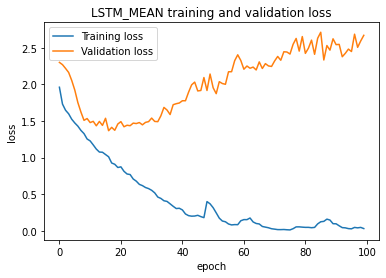

In [8]:
trainer.plot_loss("LSTM_LAST training and validation loss")

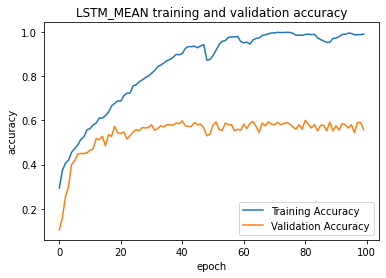

In [9]:
trainer.plot_accuracies("LSTM_LAST training and validation accuracy")

In [10]:
trainer.eval(test_dataloader)

(tensor([3, 1, 5, 2, 0, 7, 6, 2, 2, 8, 3, 4, 6, 4, 7, 5, 9, 0, 4, 0, 8, 8, 7, 0,
         6, 9, 3, 9, 3, 9, 9, 5, 5, 2, 2, 6, 1, 4, 4, 5, 5, 5, 9, 1, 3, 2, 1, 6,
         3, 4, 4, 4, 0, 3, 6, 7, 6, 0, 9, 0, 9, 9, 5, 7, 7, 9, 4, 1, 2, 3, 5, 2,
         6, 2, 0, 3, 1, 9, 6, 1, 9, 6, 5, 8, 2, 0, 8, 8, 2, 8, 5, 4, 1, 5, 5, 2,
         6, 6, 2, 2, 6, 2, 9, 4, 5, 7, 4, 2, 7, 3, 1, 2, 1, 8, 9, 8, 2, 2, 0, 1,
         3, 0, 7, 7, 1, 6, 3, 2, 5, 2, 3, 2, 2, 3, 5, 2, 0, 9, 5, 9, 9, 0, 0, 9,
         1, 2, 6, 2, 4, 1, 0, 5, 4, 3, 3, 6, 9, 6, 4, 0, 3, 0, 4, 0, 7, 7, 4, 7,
         8, 2, 4, 9, 9, 9, 8, 5, 5, 4, 1, 8, 8, 5, 7, 6, 9, 2, 4, 7, 8, 5, 2, 4,
         6, 9, 2, 5, 2, 4, 2, 0, 5, 9, 0, 1, 4, 1, 9, 0, 1, 2, 0, 5, 6, 9, 4, 5,
         0, 1, 5, 8, 2, 6, 2, 0, 7, 2, 3, 6, 0, 0, 2, 3, 0, 1, 6, 2, 3, 8, 5, 7,
         1, 5, 9, 0, 5, 2, 3, 2, 2, 0, 3, 0, 2, 4, 5, 0, 7, 0, 9, 0, 6, 3, 0, 6,
         5, 3, 3, 0, 8, 7, 0, 9, 2, 4, 8, 8, 5, 9, 9, 5, 0, 2, 9, 7, 0, 9, 9, 4,
         2, 0, 3, 9, 2, 2, 0

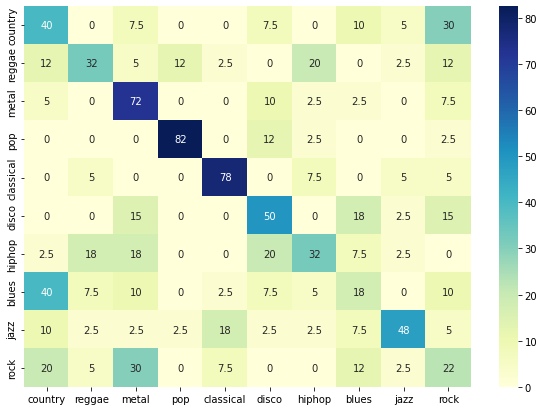

In [11]:
trainer.plot_confusion_matrix(test_dataloader)

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.31      0.40      0.35        40
      reggae       0.46      0.33      0.38        40
       metal       0.45      0.72      0.56        40
         pop       0.85      0.82      0.84        40
   classical       0.72      0.78      0.75        40
       disco       0.45      0.50      0.48        40
      hiphop       0.45      0.33      0.38        40
       blues       0.23      0.17      0.20        40
        jazz       0.70      0.47      0.57        40
        rock       0.20      0.23      0.21        40

    accuracy                           0.48       400
   macro avg       0.48      0.47      0.47       400
weighted avg       0.48      0.47      0.47       400



In [15]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model_2 = LSTM(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim,
    use_mean=False
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

LSTM(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
trainer_2 = RNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=20)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 28.91
Training loss 1.9562
Validation accuracy 13.25
Validation loss 2.3018
============================== EPOCH 2 =================================
Training accuracy 38.81
Training loss 1.7021
Validation accuracy 15.00
Validation loss 2.2774
============================== EPOCH 3 =================================
Training accuracy 41.56
Training loss 1.6183
Validation accuracy 24.00
Validation loss 2.2374
============================== EPOCH 4 =================================
Training accuracy 44.25
Training loss 1.5632
Validation accuracy 31.50
Validation loss 2.1745
============================== EPOCH 5 =================================
Training accuracy 46.25
Training loss 1.5163
Validation accuracy 37.00
Validation loss 2.0835
============================== EPOCH 6 =================================
Training accuracy 47.41
Training loss 1.4617
Validation accuracy 42.25
Validation loss 1.954

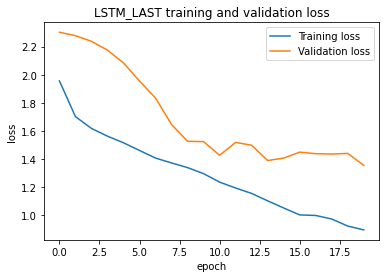

In [17]:
trainer_2.plot_loss("LSTM_LAST training and validation loss")

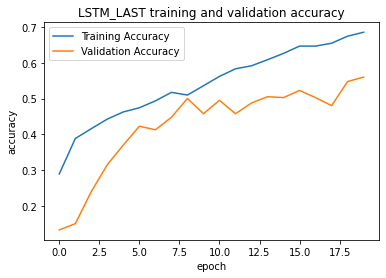

In [18]:
trainer_2.plot_accuracies("LSTM_LAST training and validation accuracy")

In [19]:
trainer_2.eval(test_dataloader)

(tensor([2, 6, 5, 4, 9, 3, 7, 2, 5, 4, 2, 4, 1, 9, 7, 9, 5, 5, 5, 9, 0, 6, 4, 7,
         9, 2, 7, 6, 6, 9, 4, 8, 8, 7, 7, 4, 2, 7, 0, 5, 6, 9, 9, 1, 6, 8, 5, 3,
         8, 7, 4, 6, 9, 5, 8, 0, 8, 2, 5, 9, 1, 8, 2, 8, 7, 2, 5, 4, 5, 7, 9, 8,
         3, 5, 2, 7, 2, 0, 7, 5, 1, 2, 6, 3, 2, 5, 4, 2, 5, 9, 2, 0, 9, 6, 4, 7,
         9, 8, 9, 7, 5, 6, 6, 2, 8, 7, 9, 9, 0, 2, 3, 4, 2, 2, 1, 2, 2, 9, 9, 7,
         3, 0, 7, 4, 1, 1, 9, 3, 9, 3, 2, 2, 0, 3, 9, 8, 9, 5, 9, 7, 5, 9, 2, 0,
         2, 9, 8, 5, 7, 6, 6, 0, 7, 8, 7, 5, 9, 1, 4, 6, 3, 9, 5, 4, 7, 3, 1, 7,
         2, 2, 5, 3, 0, 2, 0, 5, 4, 2, 6, 5, 5, 9, 1, 3, 0, 3, 5, 1, 1, 9, 6, 3,
         1, 4, 7, 6, 3, 2, 9, 2, 2, 6, 9, 5, 0, 0, 4, 5, 4, 4, 1, 3, 7, 2, 9, 1,
         3, 2, 9, 7, 4, 1, 2, 1, 8, 6, 9, 4, 5, 7, 9, 9, 9, 8, 6, 0, 2, 0, 8, 7,
         1, 2, 9, 2, 6, 1, 9, 9, 7, 1, 7, 7, 9, 5, 0, 5, 6, 2, 1, 5, 2, 2, 3, 9,
         2, 1, 2, 1, 7, 5, 7, 9, 6, 8, 6, 5, 9, 7, 6, 5, 7, 4, 5, 8, 3, 4, 8, 9,
         9, 3, 6, 5, 3, 5, 5

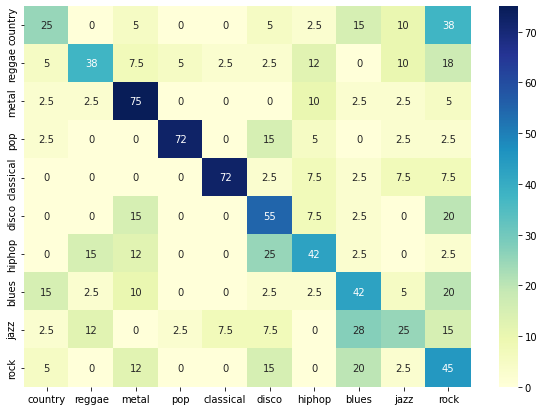

In [20]:
trainer_2.plot_confusion_matrix(test_dataloader)

In [21]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.43      0.25      0.32        40
      reggae       0.54      0.38      0.44        40
       metal       0.55      0.75      0.63        40
         pop       0.91      0.72      0.81        40
   classical       0.88      0.72      0.79        40
       disco       0.42      0.55      0.48        40
      hiphop       0.47      0.42      0.45        40
       blues       0.37      0.42      0.40        40
        jazz       0.38      0.25      0.30        40
        rock       0.26      0.45      0.33        40

    accuracy                           0.49       400
   macro avg       0.52      0.49      0.49       400
weighted avg       0.52      0.49      0.49       400

